In [42]:
import pandas as pd
import matplotlib.pyplot as plt


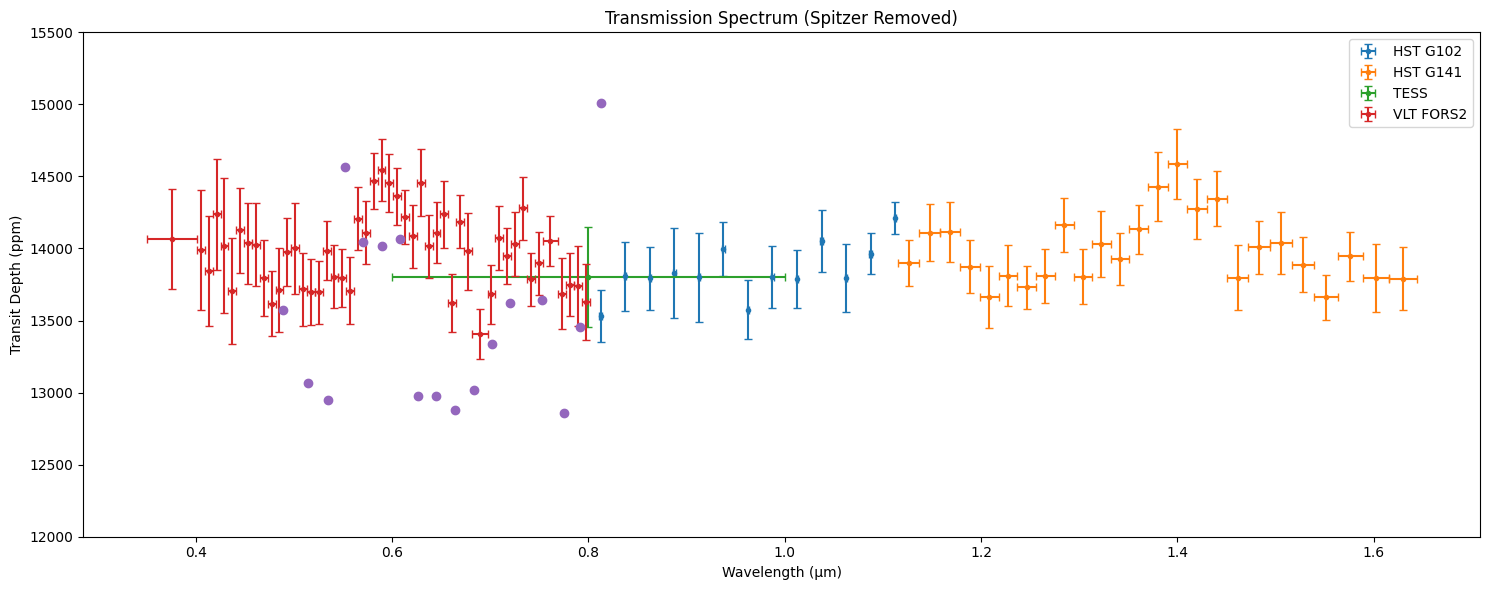

In [70]:
df = pd.read_csv("Yip_transit_depths.csv")
# print(df.head())

# Remove Spitzer data
df = df[df["Instrument"] != "Spitzer IRAC"]

# Create figure
plt.figure(figsize=(15, 6))

# Plot each instrument separately
for instrument, group in df.groupby("Instrument"):
    group = group.sort_values("Wavelength_um")
    
    plt.errorbar(
        group["Wavelength_um"],
        group["Transit_Depth_percent"] * 10000,  # convert % → ppm
        yerr=group["Error_percent"] * 10000,    # convert % → ppm
        xerr=group["Bandwidth_um"]/2,

        # group["Wavelength_um"],
        # (group["Transit_Depth_percent"])**2,  # convert % → ppm
        # yerr=group["Error_percent"],    # convert % → ppm
        # xerr=group["Bandwidth_um"]/2,

        fmt='.',
        # linestyle='-',
        capsize=3,
        label=instrument
    )

yerr_opt = np.vstack([opt["magellan_err_minus"], opt["magellan_err_plus"]])
plt.errorbar(opt["wl_mid_um"], (opt["magellan_value"]** 2) * 1e6, yerr=yerr_opt, fmt='o')

# NIR
# plt.errorbar(nir["wl_mid_um"], (nir["value"]** 2) * 1e6, yerr=nir["uncertainty"], fmt='o')

# Labels and formatting
plt.ylim(12000, 15500)
plt.xlabel("Wavelength (μm)")
# plt.xscale("log")
plt.ylabel("Transit Depth (ppm)")  # update units
plt.title("Transmission Spectrum (Spitzer Removed)")
plt.legend()
plt.tight_layout()
plt.show()


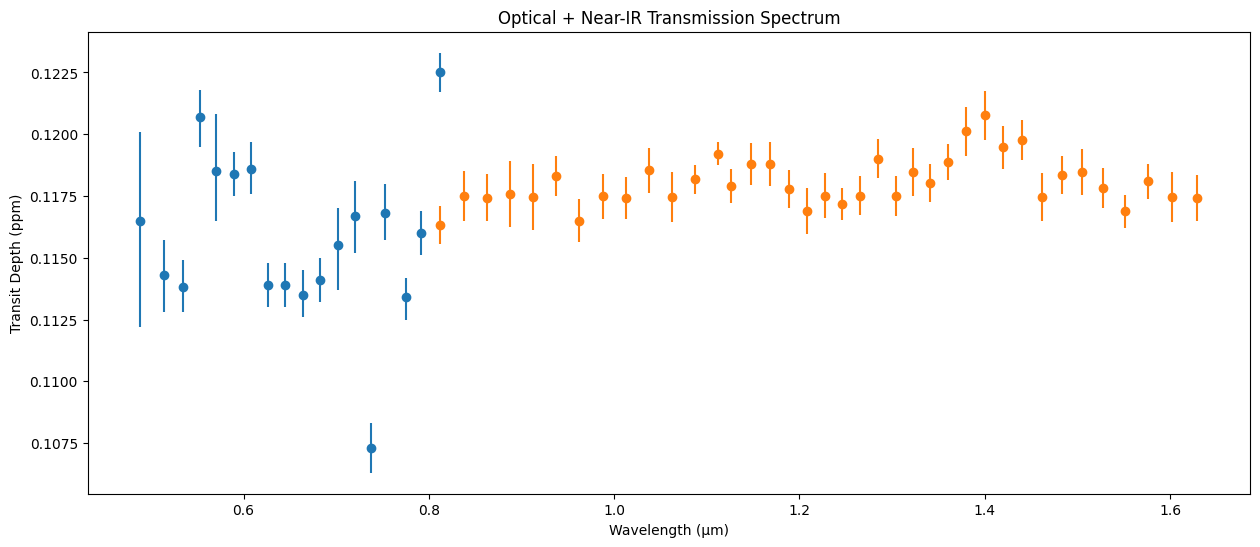

In [69]:
# Load both
opt = pd.read_csv("McGruder_transit_depth_8.csv")
nir = pd.read_csv("McGruder_transit_depth_9.csv")

# Midpoints
opt["wl_mid_A"] = (opt["wl_start_A"] + opt["wl_end_A"]) / 2
nir["wl_mid_A"] = (nir["wl_start_A"] + nir["wl_end_A"]) / 2

opt["wl_mid_um"] = opt["wl_mid_A"] * 1e-4
nir["wl_mid_um"] = nir["wl_mid_A"] * 1e-4

plt.figure(figsize=(15, 6))

# Optical
# yerr_opt = np.vstack([opt["global_err_minus"], opt["global_err_plus"]])
# plt.errorbar(opt["wl_mid_um"], opt["global_value"], yerr=yerr_opt, fmt='o')

yerr_opt = np.vstack([opt["magellan_err_minus"], opt["magellan_err_plus"]])
# plt.errorbar(opt["wl_mid_um"], (opt["magellan_value"]** 2) * 1e6, yerr=yerr_opt, fmt='o')
plt.errorbar(opt["wl_mid_um"], opt["magellan_value"], yerr=yerr_opt, fmt='o')

# NIR
# plt.errorbar(nir["wl_mid_um"], (nir["value"]** 2) * 1e6, yerr=nir["uncertainty"], fmt='o')
plt.errorbar(nir["wl_mid_um"], nir["value"], yerr=nir["uncertainty"], fmt='o')

# plt.xlabel("Wavelength (Å)")
plt.xlabel("Wavelength (μm)")
# plt.ylabel("Rp/Rs")
plt.ylabel("Transit Depth (ppm)")
plt.title("Optical + Near-IR Transmission Spectrum")
plt.show()